# CRAPS



O CRAPS é um jogo de dados (famoso em cassinos), em que o jogador lança dois dados, então soma-se as faces dos dados:

- Se a soma for **7 ou 11** na primeira rodada, o *`jogador ganha`*;
- Se for **2, 3 ou 12** na primeira rodada (ou CRAPS) o *`jogador perde`*.   
- Se a soma for **4, 5, 6, 8, 9 ou 10** na primeira rodada. Então esta soma se torna o ponto do jogador. 
  - Para ganhar, o jogador continua jogando o dado até a soma ser igual a seu ponto. 
  - O jogador perde se a soma for igual a 7.

In [1]:
# Importações necessárias
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Função responsável por rolar dados
def roll_dice():
    """Função que rola dois dados.

    Returns:
        tuple: retorno é uma tupla com o resultado empacotado.
    """
    die1 = random.randrange(1, 7)
    die2 = random.randrange(1, 7)
    return (die1, die2)

In [3]:
# Função que mostra o valor dos dados
def display_dice(dice):
    """Exibe na tela os dados e a respectiva soma.

    Args:
        dice (tuple): Uma tupla com valor de cada dado sorteado.
    """
    die1, die2 = dice
    print(f'Result: {die1} + {die2} = {sum(dice)}')

In [4]:
# Função do jogo CRAPS
def craps():
    """Função que realiza uma rodada do jogo CRAPS7

    Returns: 
        tuple: 1º - round em que ganhou ou perdeu; 2º - vitória ou derrota.
    """

    die_values = roll_dice()  # primeira rodada
    # display_dice(die_values)

    sum_dies = sum(die_values)

    counter = 1

    if sum_dies in (7, 11):  # condição de vitória
        game_status = 'WON'
    elif sum_dies in (2, 3, 12):  # condição de derrota
        game_status = 'LOSE'
    else:  # segue o jogo
        game_status = 'CONTINUE'
        player_point = sum_dies
        # print(f'My point is {player_point}')

    # looping até chegar condição de vitoria ou derrota
    while game_status == 'CONTINUE':
        die_values = roll_dice()  # outras rodadas
        # display_dice(die_values)
        sum_dies = sum(die_values)

        if counter > 12:
            counter = 13
        else:
            counter += 1

        if sum_dies == player_point:
            game_status = 'WON'
        elif sum_dies == 7:
            game_status = 'LOSE'

    # Mensagem de vitória ou derrota
    if game_status == 'WON':
        # print(f'Congratulations, you WIN in {counter}º round!')
        return (counter, game_status)
    else:
        # print(f'You LOSE in {counter}º round, try again!')
        return (counter, game_status)

## Início das análises

- Exibir um gráfico de barra horizontal indicando quantos jogos foram ganhos e quanto foram perdidos no primeiro lançamento, segundo lançamento, terceiro lançamento, etc. Uma vez que o jogo poderia continuar indefinidamente, você pode acompanhar as vitórias e derrotas na primeira dúzia lançamentos, em seguida, manter dois contadores que controlam as vitórias e perdas após 12 lançamentos - não importa quanto tempo o jogo leve. Crie barras separadas para vitórias e derrotas.

- Quais são as chances de ganhar no craps? `[Nota: Você deve descobrir que craps é um dos jogos de casino mais justos. O que você acha que isso significa?]`

- Qual é a média para a duração de um jogo de dados? A mediana? O modo?
As chances de vitória aumentam com a duração do jogo?

In [277]:
games = [craps() for i in range(1000000)]

In [283]:
g = pd.DataFrame(games, columns=["ROUND", "STATUS"])
g.head(20)

,ROUND,STATUS
0,5,WON
1,4,LOSE
2,3,LOSE
3,1,WON
4,7,LOSE
5,2,LOSE
6,7,LOSE
7,5,LOSE
8,1,LOSE
9,4,LOSE


In [279]:
# Criando novo dataset com vitorias e derrotas por rodada
win = []
lose = []
total = []

for i in range(1, 14):
    win.append(g.loc[(g['ROUND'] == i) & (g['STATUS'] == 'WON')].count()[0])
    lose.append(g.loc[(g['ROUND'] == i) & (g['STATUS'] == 'LOSE')].count()[0])

data = {
    'Round': ['1','2','3','4','5','6','7','8','9','10','11','12','13+'],
    'Vitórias' : win,
    'Derrotas' : lose,
}

df = pd.DataFrame(data)

In [280]:
# Adicionando total de jogos por rodada
df['TOTAL'] = df['Vitórias'] + df['Derrotas']

In [281]:
# Percentual de vitórias e derrotas por rodada
df['Vit. (%)'] = (df['Vitórias'] / df['TOTAL']) * 100
df['Derr. (%)'] = (df['Derrotas'] / df['TOTAL']) * 100
df

,Round,Vitórias,Derrotas,TOTAL,Vit. (%),Derr. (%)
0,1,222436,111192,333628,66.671862,33.328138
1,2,77202,110828,188030,41.058342,58.941658
2,3,54917,80042,134959,40.691617,59.308383
3,4,39074,57046,96120,40.651269,59.348731
4,5,27998,41627,69625,40.212567,59.787433
5,6,20178,29746,49924,40.417435,59.582565
6,7,14216,21261,35477,40.071032,59.928968
7,8,10306,15384,25690,40.116777,59.883223
8,9,7243,11156,18399,39.366270,60.633730
9,10,5232,8004,13236,39.528558,60.471442


## Gráfico

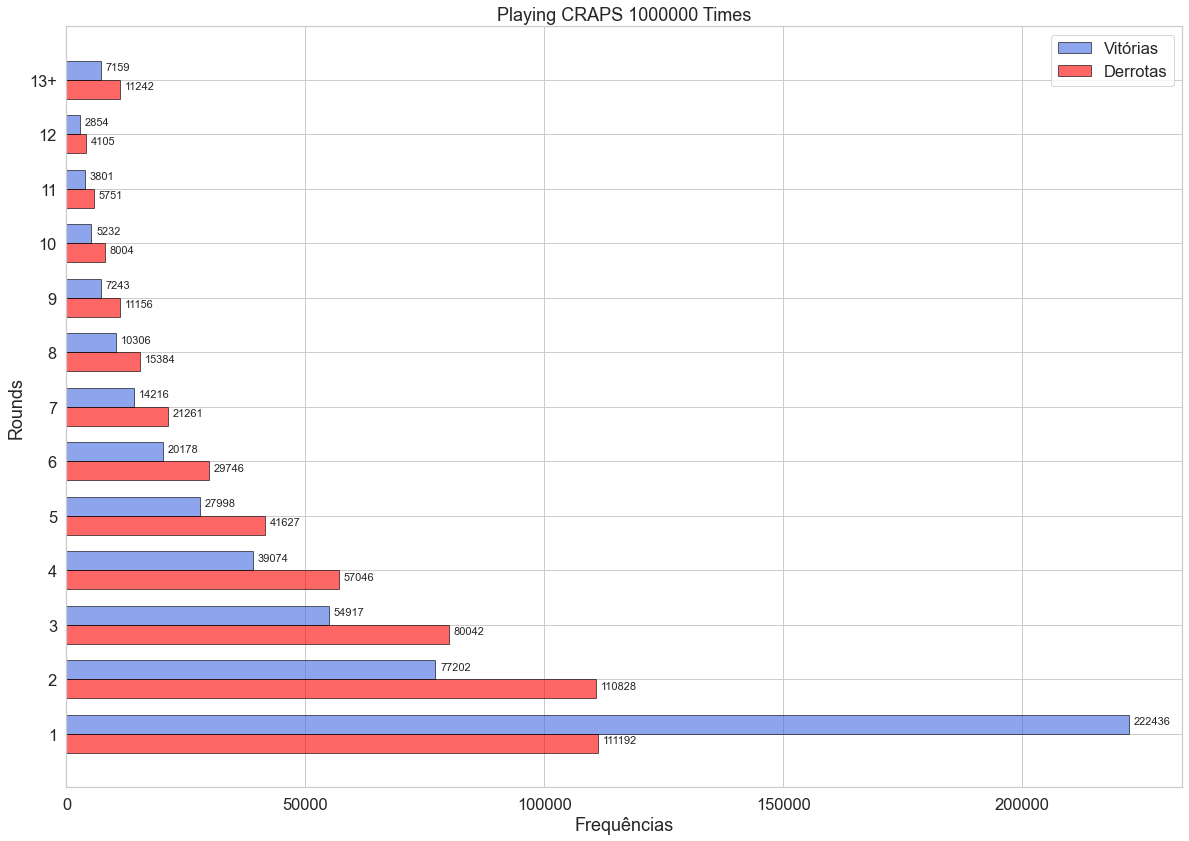

In [287]:
# Definicoes gerais
plt.figure(figsize = (20, 14))
bar_width = .35
index = np.arange(13)

# Grafico vitorias
plt.barh(index, 
         df['Vitórias'], 
         ec = "k", 
         alpha = .6, 
         color = "royalblue", 
         height = bar_width, 
         label = "Vitórias")

# Grafico -> derrotas
plt.barh(index - bar_width, 
         df['Derrotas'], 
         ec = "k", 
         alpha = .6, 
         color = "red", 
         height = bar_width, 
         label = "Derrotas")

# Labels barras
for i, v in enumerate(df['Vitórias']):
    plt.text(v + 1000, i, f'{v}', fontsize=11)
for i, v in enumerate(df['Derrotas']):
    plt.text(v + 1000, i - bar_width, f'{v}', fontsize=11)

plt.yticks(index - bar_width / 2, df['Round'])
plt.title(f'Playing CRAPS {len(games)} Times')
plt.xlabel(f'Frequências')
plt.ylabel(f'Rounds')
plt.savefig('plot_bar.jpg')
plt.legend()